# Case study
''' Assessing Models¶ In data science, a "model" is a set of assumptions about data ( eg heights of people as a NORMAL distribution). Often, models include assumptions about chance processes used to generate data. In later sections we will use the methods developed here as the building blocks of a general framework for testing hypotheses.'''

""" men aged 21 or older were allowed to serve on juries in Talladega County. In the county, 26% of the eligible jurors were black, but there were only 8 black men among the 100 selected for the jury panel in Swain's trial. No black man was selected for the trial jury.

In 1965, the Supreme Court of the United States denied Swain's appeal. In its ruling, the Court wrote "... the overall percentage disparity has been small and reflects no studied attempt to include or exclude a specified number of Negroes." Jury panels are supposed to be selected at random from the eligible population. Because 26% of the eligible population was black, 8 black men on a panel of 100 might seem low."""

"""A Model¶ But one view of the data – a model, in other words – is that the panel was selected at random and ended up with a small number of black men just due to chance. This model is consistent with what the Supreme Court wrote in its ruling. The model specifies the details of a chance process. It says the data are like a random sample from a population in which 26% of the people are black. """

"""We can simulate data based on the model. That is, we can simulate drawing at random from a population of whom 26% are black. Our simulation will show what a panel would look like if it were selected at random. We can then compare the results of the simulation with the composition of Robert Swain's panel. If the results of our simulation are not consistent with the composition of Swain's panel, that will be evidence against the model of random selection.

"""

""" The Statistic¶ First, we have to choose a statistic to simulate. The statistic has to be able to help us decide between the model and alternative views about the data. The model says the panel was drawn at random. The alternative viewpoint, suggested by Robert Swain's appeal, is that the panel was not drawn at random because it contained too few black men. A natural statistic, then, is the number of black men in our simulated sample of 100 men representing the panel. Small values of the statistic will favor the alternative viewpoint"""

""" Generating One Value of the Statistic¶ First figure out how to simulate one value of the statistic. For this, sample 100 times at random from the population of eligible jurors and count the number of black men .

---One way is to set up a table representing the eligible population and use sample. ---a quicker way... use a datascience function tailored for sampling at random from categorical distributions. """

""" The sample_proportions function in the datascience library takes two arguments: ---the sample size ---the distribution of the categories in the population, as a list or array of proportions that add up to 1 """

""" It returns an array containing the distribution of the categories in a random sample of the given size taken from the population. That's an array consisting of the sample proportions in all the different categories. The panel is selected at random from a population of men among whom 26% were black and 74% were not. Thus the distribution of the two categories can be represented as the list [0.26, 0.74] have assigned to the name eligible_population .

Now sample at random 100 times from this distribution, and see what proportions of the two categories we get in our sample."""

In [1]:
eligible_population = [0.26, 0.74]


In [2]:
import numpy as np


In [3]:
import numpy.random as npr


In [4]:
 npr.binomial(100, 0.26)
# how many out of 100 jurors were black in this simulated selection.


18

In [5]:
simulations = 1000
for i in np.arange(simulations):
    count_pop_black = npr.binomial(100, 0.26, simulations)

In [6]:
count_pop_black[1:5]


array([26, 28, 30, 30])

In [7]:
%matplotlib inline


In [8]:
import pandas as pd


In [9]:
panel_df = pd.DataFrame(count_pop_black)
panel_df.head(3)

,0
0,24
1,26
2,28


In [10]:
panel_df.size


1000

In [11]:
import matplotlib.pyplot as plt


In [12]:
%matplotlib inline


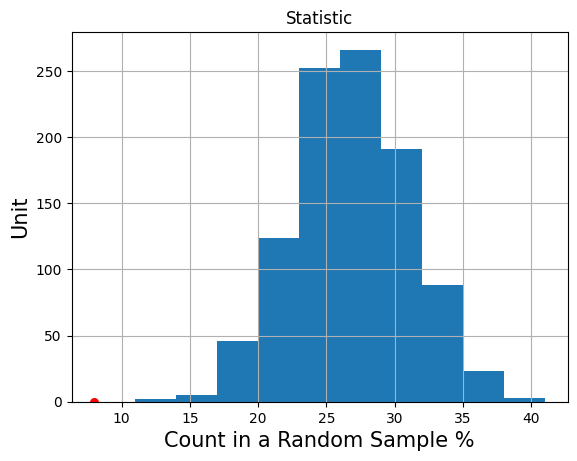

In [13]:
panel_df.hist()
plt.title('Statistic');
plt.xlabel('Count in a Random Sample %',fontsize=15)
plt.ylabel('Unit',fontsize=15);
plt.scatter(8, 0, color='red', s=30)


# inf
""" The histogram tells us what the model of random selection predicts about our statistic, the count of black men in the sample. To generate each simulated count, we drew at 100 times at random from a population in which 26% were black. So, as you would expect, most of the simulated counts are around

They are not exactly 26 – there is some variation. The counts range between about 10 and 45."""
"""Comparing the Prediction and the Data¶ Though the simulated counts are quite varied, very few of them came out to be eight or less. The value eight is far out in the left hand tail of the histogram. It's the red dot on the horizontal axis of the histogram. """

"""Thus the simulation shows that if we select a panel of 100 jurors at random from the eligible population, we are very unlikely to get counts of black men as low as the eight that were in Swain's jury panel. This is evidence that the model of random selection of the jurors in the panel is not consistent with the data from the panel. When the data and a model are inconsistent, the model is hard to justify. After all, the data are real. The model is just a set of assumptions. When assumptions are at odds with reality, we have to question those assumptions. While it is possible that a panel like Robert Swain's could have been generated by chance, our simulation demonstrates that it is very unlikely. Thus our assessment is that the model of random draws is not supported by the evidence. Swain's jury panel does not look like the result of random sampling from the population of eligible jurors. """

In [1]:
from scipy.stats import binom

# Parameters for the binomial distribution
n = 100       # number of trials (jurors)
p = 0.26      # probability of success (selecting a black juror)

# Observed number of black jurors
observed_black_jurors = 8

# Calculate the P-value (probability of 8 or fewer black jurors)
p_value = binom.cdf(observed_black_jurors, n, p)

print(f"P-value: {p_value}")


P-value: 4.734794997889318e-06
